In [124]:
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import pandas as pd
import matplotlib.pyplot as plt
db=pd.read_csv("Police_Department_Incidents_-_Previous_Year__2016_.csv")
db.head()

def columnswap(db,i,j):
    col_list = list(db)

    col_list[i], col_list[j] = col_list[j], col_list[i]

    db.columns = col_list
db['month']=[int(x[0]+x[1]) for x in db.Date]
db['hour']=[int(x[0]+x[1])for x in db.Time]
db

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,month,hour
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120,1,11
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168,1,11
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010,4,14
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000,1,23
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134,12,21
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000,12,8
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372,12,20
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374,12,10


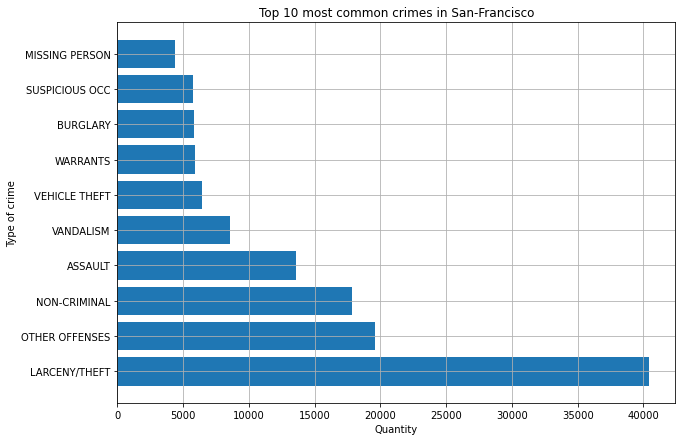

In [100]:
dbbrah=db.groupby('Category').count().sort_values(by='IncidntNum',ascending=False).head(10)
plt.barh(dbbrah.index, dbbrah['IncidntNum'])
plt.xlabel('Quantity')
plt.ylabel('Type of crime')
plt.title('Top 10 most common crimes in San-Francisco')
plt.grid()

*Отсюда мы видим, что самое частое преступление это воровство*

Text(0.5, 1.0, 'Quantity of crimes in San-Francisco')

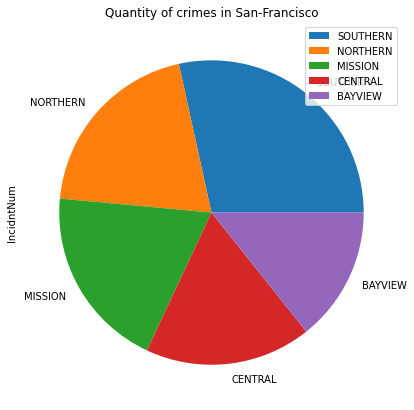

In [101]:
name_dynamics = db.groupby(['PdDistrict']).count().sort_values(by='IncidntNum', ascending=False).head(5)
name_dynamics.plot(kind='pie', y='IncidntNum')
plt.title('Quantity of crimes in San-Francisco')

*Отсюда мы видим, что большая часть преступлений приходится на южную часть Сан-Франциско в то время, как в остальных регионах кол-во преступлений примерно одинаково*

Text(0, 0.5, 'quantity')

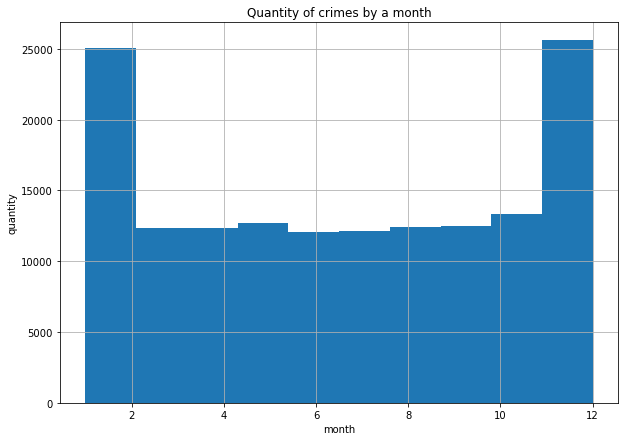

In [122]:
ax = db['month'].hist()
ax.set_title('Quantity of crimes by a month')
ax.set_xlabel('month')
ax.set_ylabel('quantity')

*Здесь мы видим, что большая часть преступлений произошла зимой(с декабря до февраля)*

In [153]:
veh=db[db.Category=='VEHICLE THEFT']
veh.groupby(['hour']).count()[['X']].sort_values('X',ascending=False).rename(columns={'X':'quantity of vehicle thefts'}).style.bar()

,quantity of vehicle thefts
hour,
18,539
20,517
22,493
19,473
17,469
21,466
23,402
16,338
15,263


*Отсюда видно, что большая часть похищений транспорта приходится на промежуток времени 17-23 часов*